<a href="https://colab.research.google.com/github/seemantobarman/amazon_stock_trend_prediction_RNN/blob/master/Amazon_Stock_Trend_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**__Data preprocessing__**



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
training_dataset = pd.read_csv("/content/drive/My Drive/Data/amazon_dataset/AMZNtrain.csv")

In [0]:
training_set = training_dataset.iloc[:,1:2].values

**Feature Scaling**

In [0]:
from sklearn.preprocessing import MinMaxScaler

_scale = MinMaxScaler(feature_range=(0,1))
scaled_training_set = _scale.fit_transform(training_set)

**Creating the structure and the time steps (Time steps can cause overfitting or underfitting)**

In [0]:
X_train = []
Y_train = []

for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i,0])
    Y_train.append(scaled_training_set[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

**Reshaping the data**

**Batch size, Time steps, Number of indicators**

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

**Making the RNN**

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
regressor = Sequential()

In [0]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1) ))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(rate=0.2))

In [0]:
regressor.add(Dense(units=1))

In [0]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
history = regressor.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0244
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0051
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0033
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0035
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0030
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0026
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0031
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0024
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0024
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0022
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0025
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

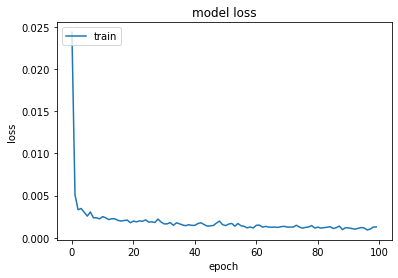

In [14]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [0]:
testing_dataset = pd.read_csv("/content/drive/My Drive/Data/amazon_dataset/AMZNtest.csv")
real_stock_price = testing_dataset.iloc[:,1:2].values

**Prediction**

Axis 0 means vertical concatination.

In [0]:
total_dataset = pd.concat((training_dataset['Open'], testing_dataset['Open']), axis=0)
inputs = total_dataset[len(total_dataset) - len(testing_dataset) - 60 : ].values
inputs = inputs.reshape(-1,1)
inputs = _scale.transform(inputs)

In [0]:
X_test = []

for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = _scale.inverse_transform(predicted_stock_price)

In [21]:
print(predicted_stock_price)

[[1451.7552]
 [1468.6885]
 [1486.1675]
 [1501.5645]
 [1519.5292]
 [1544.5658]
 [1570.5754]
 [1589.6382]
 [1599.0732]
 [1598.0374]
 [1592.2583]
 [1591.7214]
 [1597.8147]
 [1611.1163]
 [1624.4164]
 [1631.2334]
 [1630.0823]
 [1627.1855]
 [1623.304 ]
 [1618.409 ]]


**Visualising**

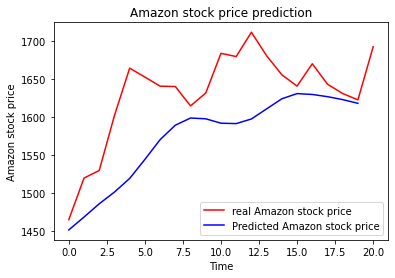

In [22]:
plt.plot(real_stock_price, color='red', label='real Amazon stock price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Amazon stock price')
plt.title('Amazon stock price prediction')
plt.xlabel('Time')
plt.ylabel('Amazon stock price')
plt.legend()
plt.show()